## Домашная работа №2

В этом домашнем задании вам необходимо будет решить задачу регрессии (предсказание цен). Данные находятся в файле `data.csv`. При выполнении задания вам нужно проделать следующие шаги:


### EDA (5 баллов)
1) Заполните пропуски в данных (объясните, почему тот или иной способ пропуска наилучший) (*1 балл*)

2) Визуализируйте распределения признаков, сделайте вывод о том, какие признаки являются категориальными, какие числовыми (*1 балл*)

3) Очистите выборку от выбросов, поясните, почему эти объекты вы посчитали выбросами (*1 балл*)

4) Рассмотрите матрицу корреляций, удалите высоко скорелированные между собой признаки (если считаете, что этого делать не нужно, то напишите почему), объясните свой выбор (*1 балл*)

5) Визуализируйте данные алгоритмом TSNE, сделайте выводы о разделимости данных и выполнении гипотезы компактности. Попробуйте настроить гиперпараметры алгоритма так, чтобы разделимость была наилучшей (*1 балл*)





### Feature Engineering (5+ баллов)
1) Обработайте все категориальные признаки, используя Target / One-hot / label / feature encoding, объясните свой выбор (*2 балла*)

2) Для числовых признаков создайте новые признаки, имеющие высокую корреляцию с целевой переменной (выше, чем у начальных признаков). Сделайте не менее 5 новых признаков, за очень крутые результаты в этом пункте можно получить дополнительные баллы (*2+ балла*)

3) Сделайте бинарные признаки-индикаторы на основе числовых признаков (признак-индикатор - это, например признак "значение признака x больше 10000"), объясните, почему вы считаете, что эти индикаторы могут быть полезны (*1 балл*)

### Modelling (5 баллов)
1) Предложите наилучшую схему разбиения датасета на трейн, валидацию и тест, проверьте, что распределения выборок совпадают (*1 балл*)

2) Попробуйте несколько моделей с подбором гиперпараметров, сделайте вывод о том, какая модель дает наилучшее качество и почему (*1 балл*)

3) Постройте график feature importance, сделайте выводы и качестве признаков, сравните feature importance с матрицей корреляции. Посмотрите также, какие признаки зануляет Lasso регрессия, сравните результаты с feature importance (*2 балла*)

4) Отберите наилучшие признаки и обучите финальную модель (*1 балл*)

**Важно:** при выполнении этого задания не обязательно ограничиваться только этими пунктами. Вы можете проводить любые дополнительные исследования и применять различные техники, если это потребуется. В каждом пункте обязательно объясняйте результаты и свой ход мыслей при принятии различных решений. Если будет просто код, то есть большой шанс получить очень мало баллов.

**Ограничения:** в пункте `Modelling` можно использовать только те модели, которые были рассмотрены на занятиях. Подбирать гиперпараметры можно любые, не только те, что рассмотрены на занятиях. В остальных пунктам ограничений на используемые алгоритмы нет.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


import sklearn
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score
import numpy as np


from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering


In [7]:
data = pd.read_csv('data.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [8]:
del data['Id']

Этот столбец нам не нужен

## Заполним пропуски в данных

In [9]:
data_nan = data.isna().mean() * 100
data_nan[data_nan!=0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

#### LotFrontage

In [10]:
data['LotFrontage'].fillna(0, inplace=True)

LotFrontage: Фасад участка, который измеряется по передней линии участка, прилегающей к улице. Заменим пропуски нулями там, где участок не прилегает к улице. Процент пропусков = 17%.

#### Alley


In [11]:
data['Alley'].fillna('No', inplace=True)

Alley: Тип дорожки к участку. Заменим все NaN на 'No'. Процент пропусков = 93%.

#### MasVnrType

In [12]:
data = data[data['MasVnrType'].notna()]

MasVnrType: Тип облицовки кладки. Удалим те, что имеют NaN. Процент пропусков = 0.5%.

#### MasVnrArea

In [13]:
data = data[data['MasVnrArea'].notna()]

MasVnrArea: Площадь облицовки каменной кладкой в квадратных футах. Удалим те, что имеют NaN. Процент пропусков = 0.5%.

#### BsmtQual

In [14]:
data['BsmtQual'].fillna('No', inplace=True)

BsmtQual: Качество подвала по его высоте. Заменим все NaN на 'No', так как пропуски означают отсутствие подвала. Процент пропусков = 2.5%.

#### BsmtCond

In [15]:
data['BsmtCond'].fillna('No', inplace=True)

BsmtCond: Качество общего состояния подвала. Заменим все NaN на 'No', так как пропуски означают отсутствие подвала. Процент пропусков = 2.5%.

#### BsmtExposure


In [16]:
data['BsmtExposure'].fillna('No', inplace=True)

BsmtExposure: Аналогично. Процент пропусков = 2.6%.

#### BsmtFinType1

In [17]:
data['BsmtFinType1'].fillna('No', inplace=True)

BsmtFinType1: Аналогично. Процент пропусков = 2.5%.

#### BsmtFinType2

In [18]:
data['BsmtFinType2'].fillna('No', inplace=True)

BsmtFinType2: Аналогично. Процент пропусков = 2.6%.

#### Electrical

In [19]:
data = data[data['Electrical'].notna()]

Electrical: Электрическая система. Всего лишь один пропуск, который можно просто выкинуть. Процент пропусков = 0.06%.

#### FireplaceQu

In [20]:
data['FireplaceQu'].fillna('No', inplace=True)

FireplaceQu: Качество камина. Заменим все NaN на 'No', так как пропуски означают отсутствие камина. Процент пропусков = 47%.

#### GarageType

In [21]:
data['GarageType'].fillna('No', inplace=True)

GarageType: Расположение гаража. Заменим все NaN на 'No', так как пропуски означают отсутствие гаража. Процент пропусков = 5,5%.

#### GarageYrBlt

In [22]:
data['GarageYrBlt'].fillna('No', inplace=True)

GarageYrBlt: Год постройки гаража. Заменим все NaN на 'No', так как пропуски означают отсутствие гаража. Процент пропусков = 5,5%.

#### GarageFinish

In [23]:
data['GarageFinish'].fillna('No', inplace=True)

GarageFinish: Завершенность внутренней отделки гаража. Заменим все NaN на 'No', так как пропуски означают отсутствие гаража. Процент пропусков = 5,5%.

#### GarageQual

In [24]:
data['GarageQual'].fillna('No', inplace=True)

GarageQual: Качество гаража. Заменим все NaN на 'No', так как пропуски означают отсутствие гаража. Процент пропусков = 5,5%.

#### GarageCond

In [25]:
data['GarageCond'].fillna('No', inplace=True)

GarageCond: Качество гаража. Заменим все NaN на 'No', так как пропуски означают отсутствие гаража. Процент пропусков = 5,5%.

#### PoolQC

In [26]:
data['PoolQC'].fillna('No', inplace=True)

PoolQC: Качество бассейна. Заменим все NaN на 'No', так как пропуски означают отсутствие бассейна. Процент пропусков = 99,5%.

#### Fence

In [27]:
data['Fence'].fillna('No', inplace=True)

Fence: Качество забора. Заменим все NaN на 'No', так как пропуски означают отсутствие забора. Процент пропусков = 80,75%.

#### MiscFeature

In [28]:
data['MiscFeature'].fillna('No', inplace=True)

MiscFeature: Другие функции, не включенные в другие категории. Заменим все NaN на 'No', так как пропуски означают отсутствие. Процент пропусков = 96,3%.

In [29]:
data_nan = data.isna().mean() * 100
data_nan[data_nan!=0]

Series([], dtype: float64)

## Визуализируем распределения признаков

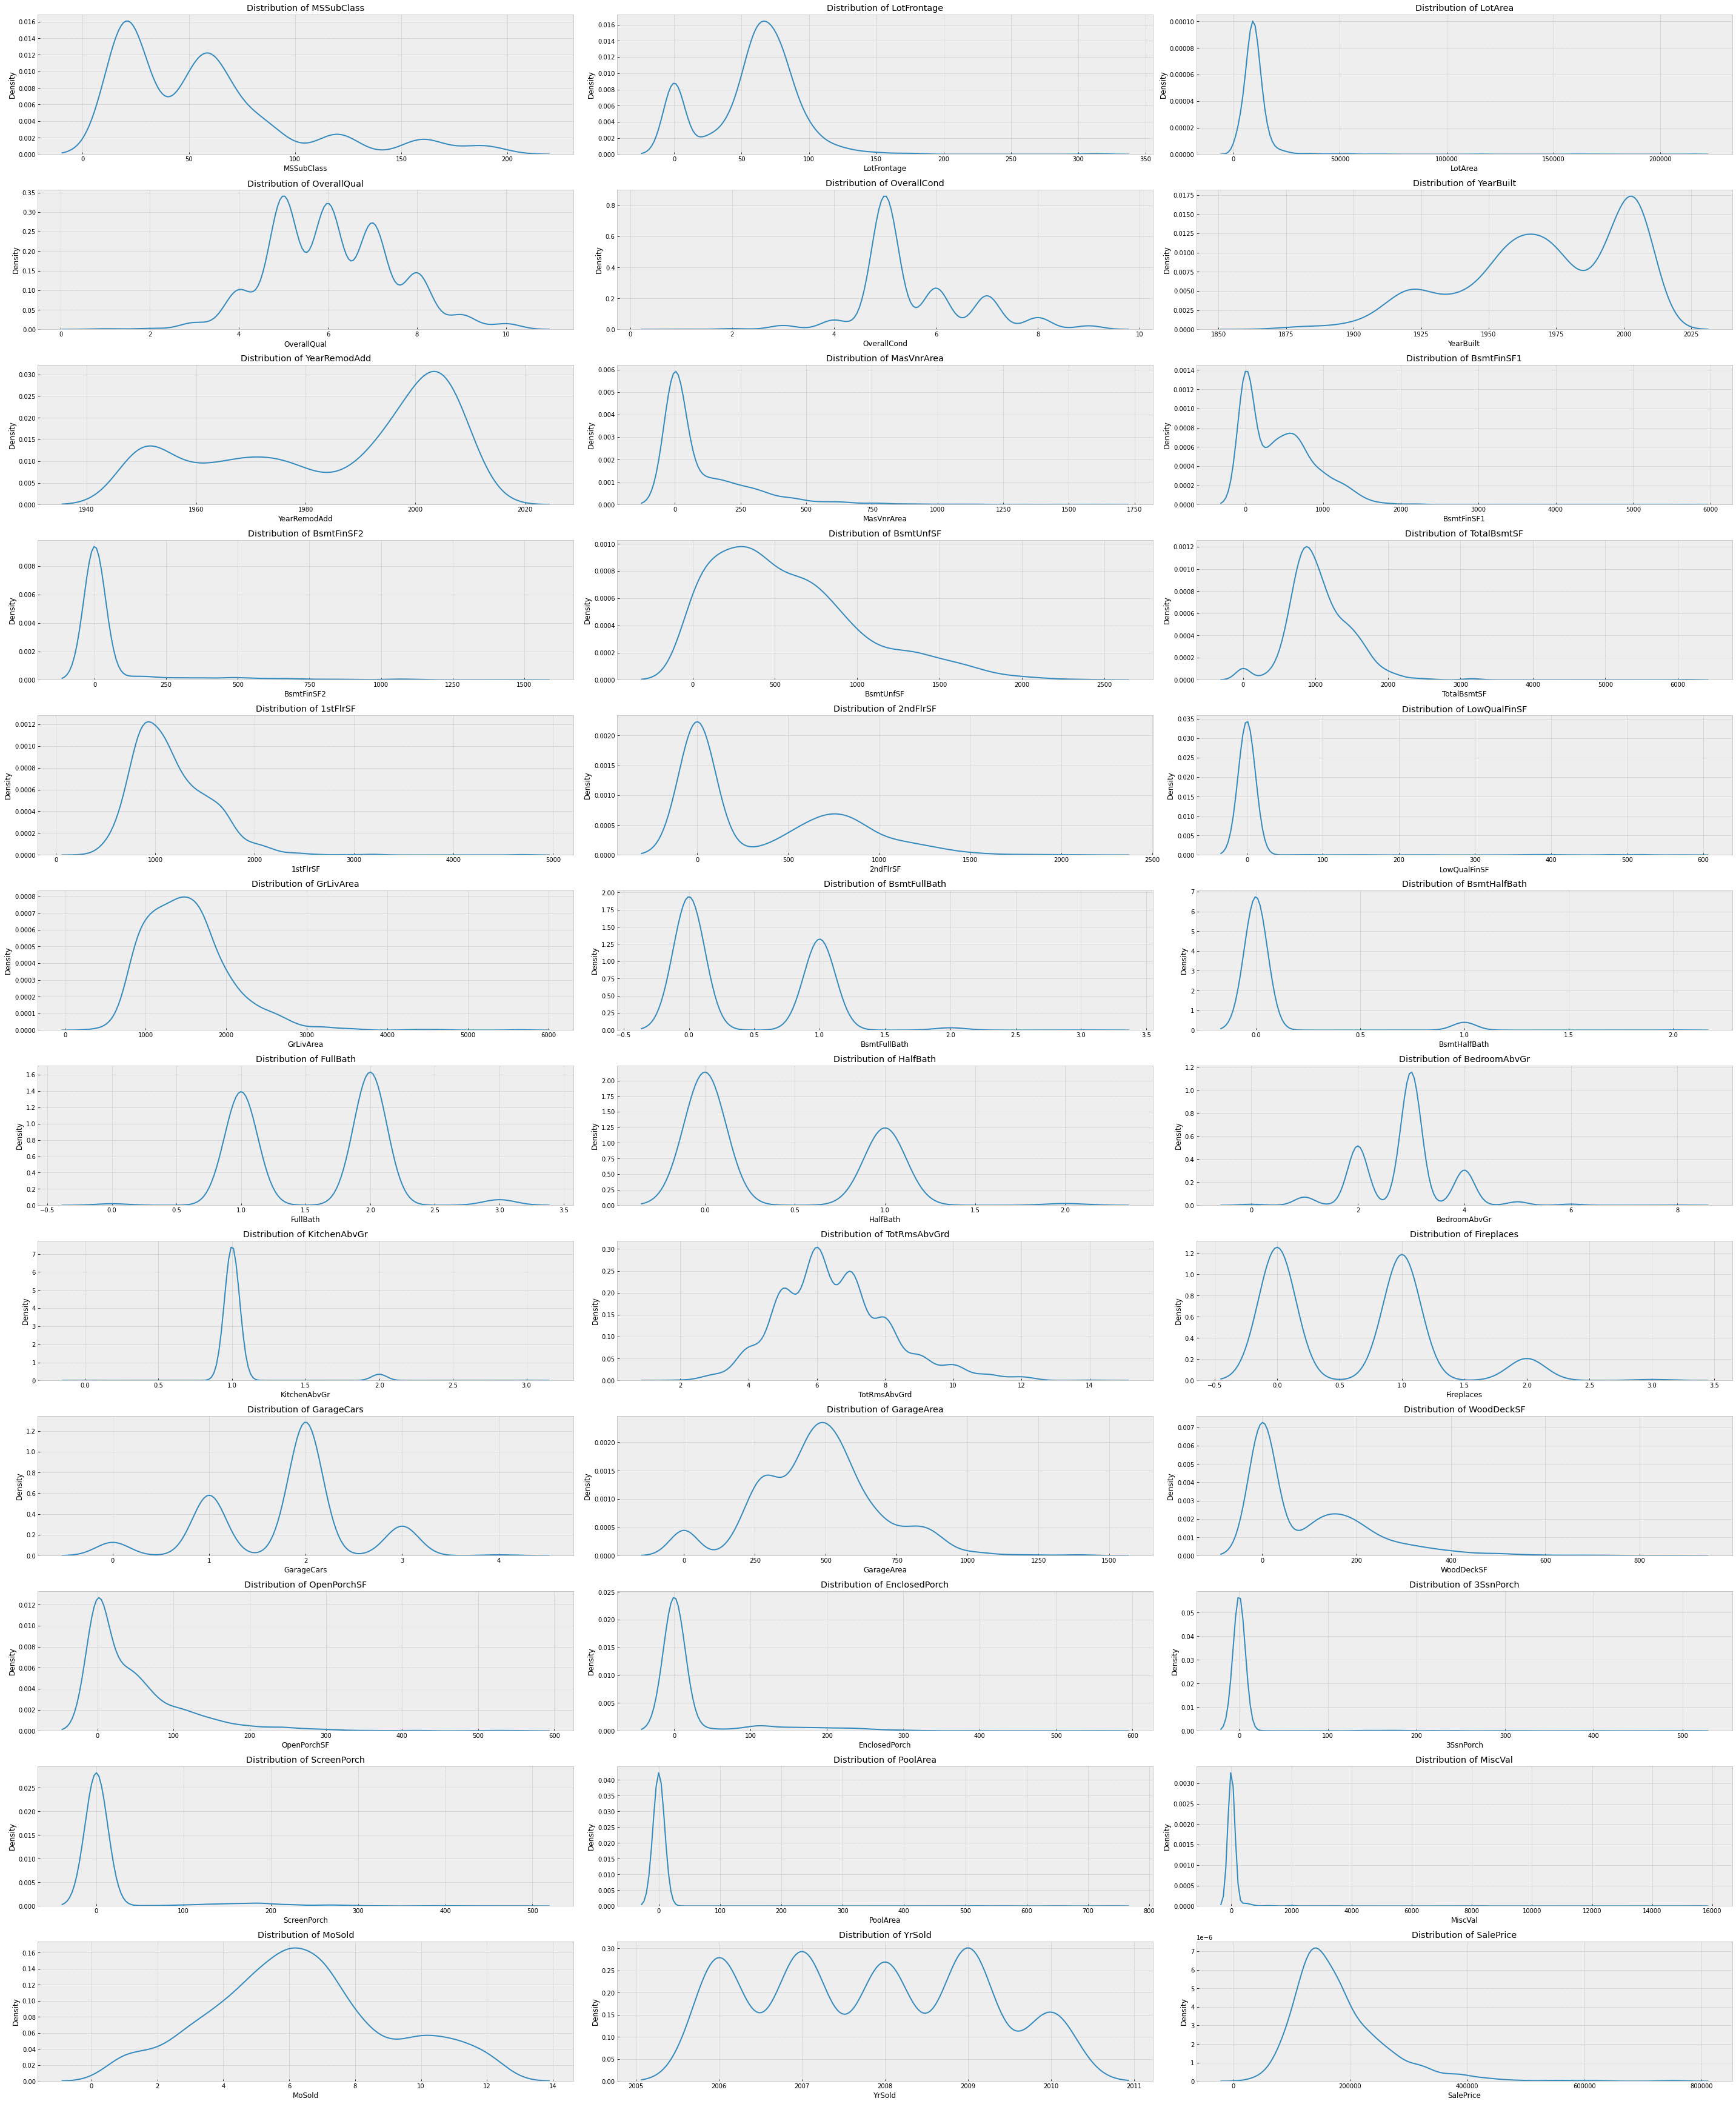

In [30]:
plt.figure(figsize=(40, 80))
plt.style.use('bmh')

num = 0
for col in data.columns:
    
    if data[col].dtype == 'object':
        continue
    num += 1
    plt.subplot(20, 3, num)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    sns.kdeplot(data[col])

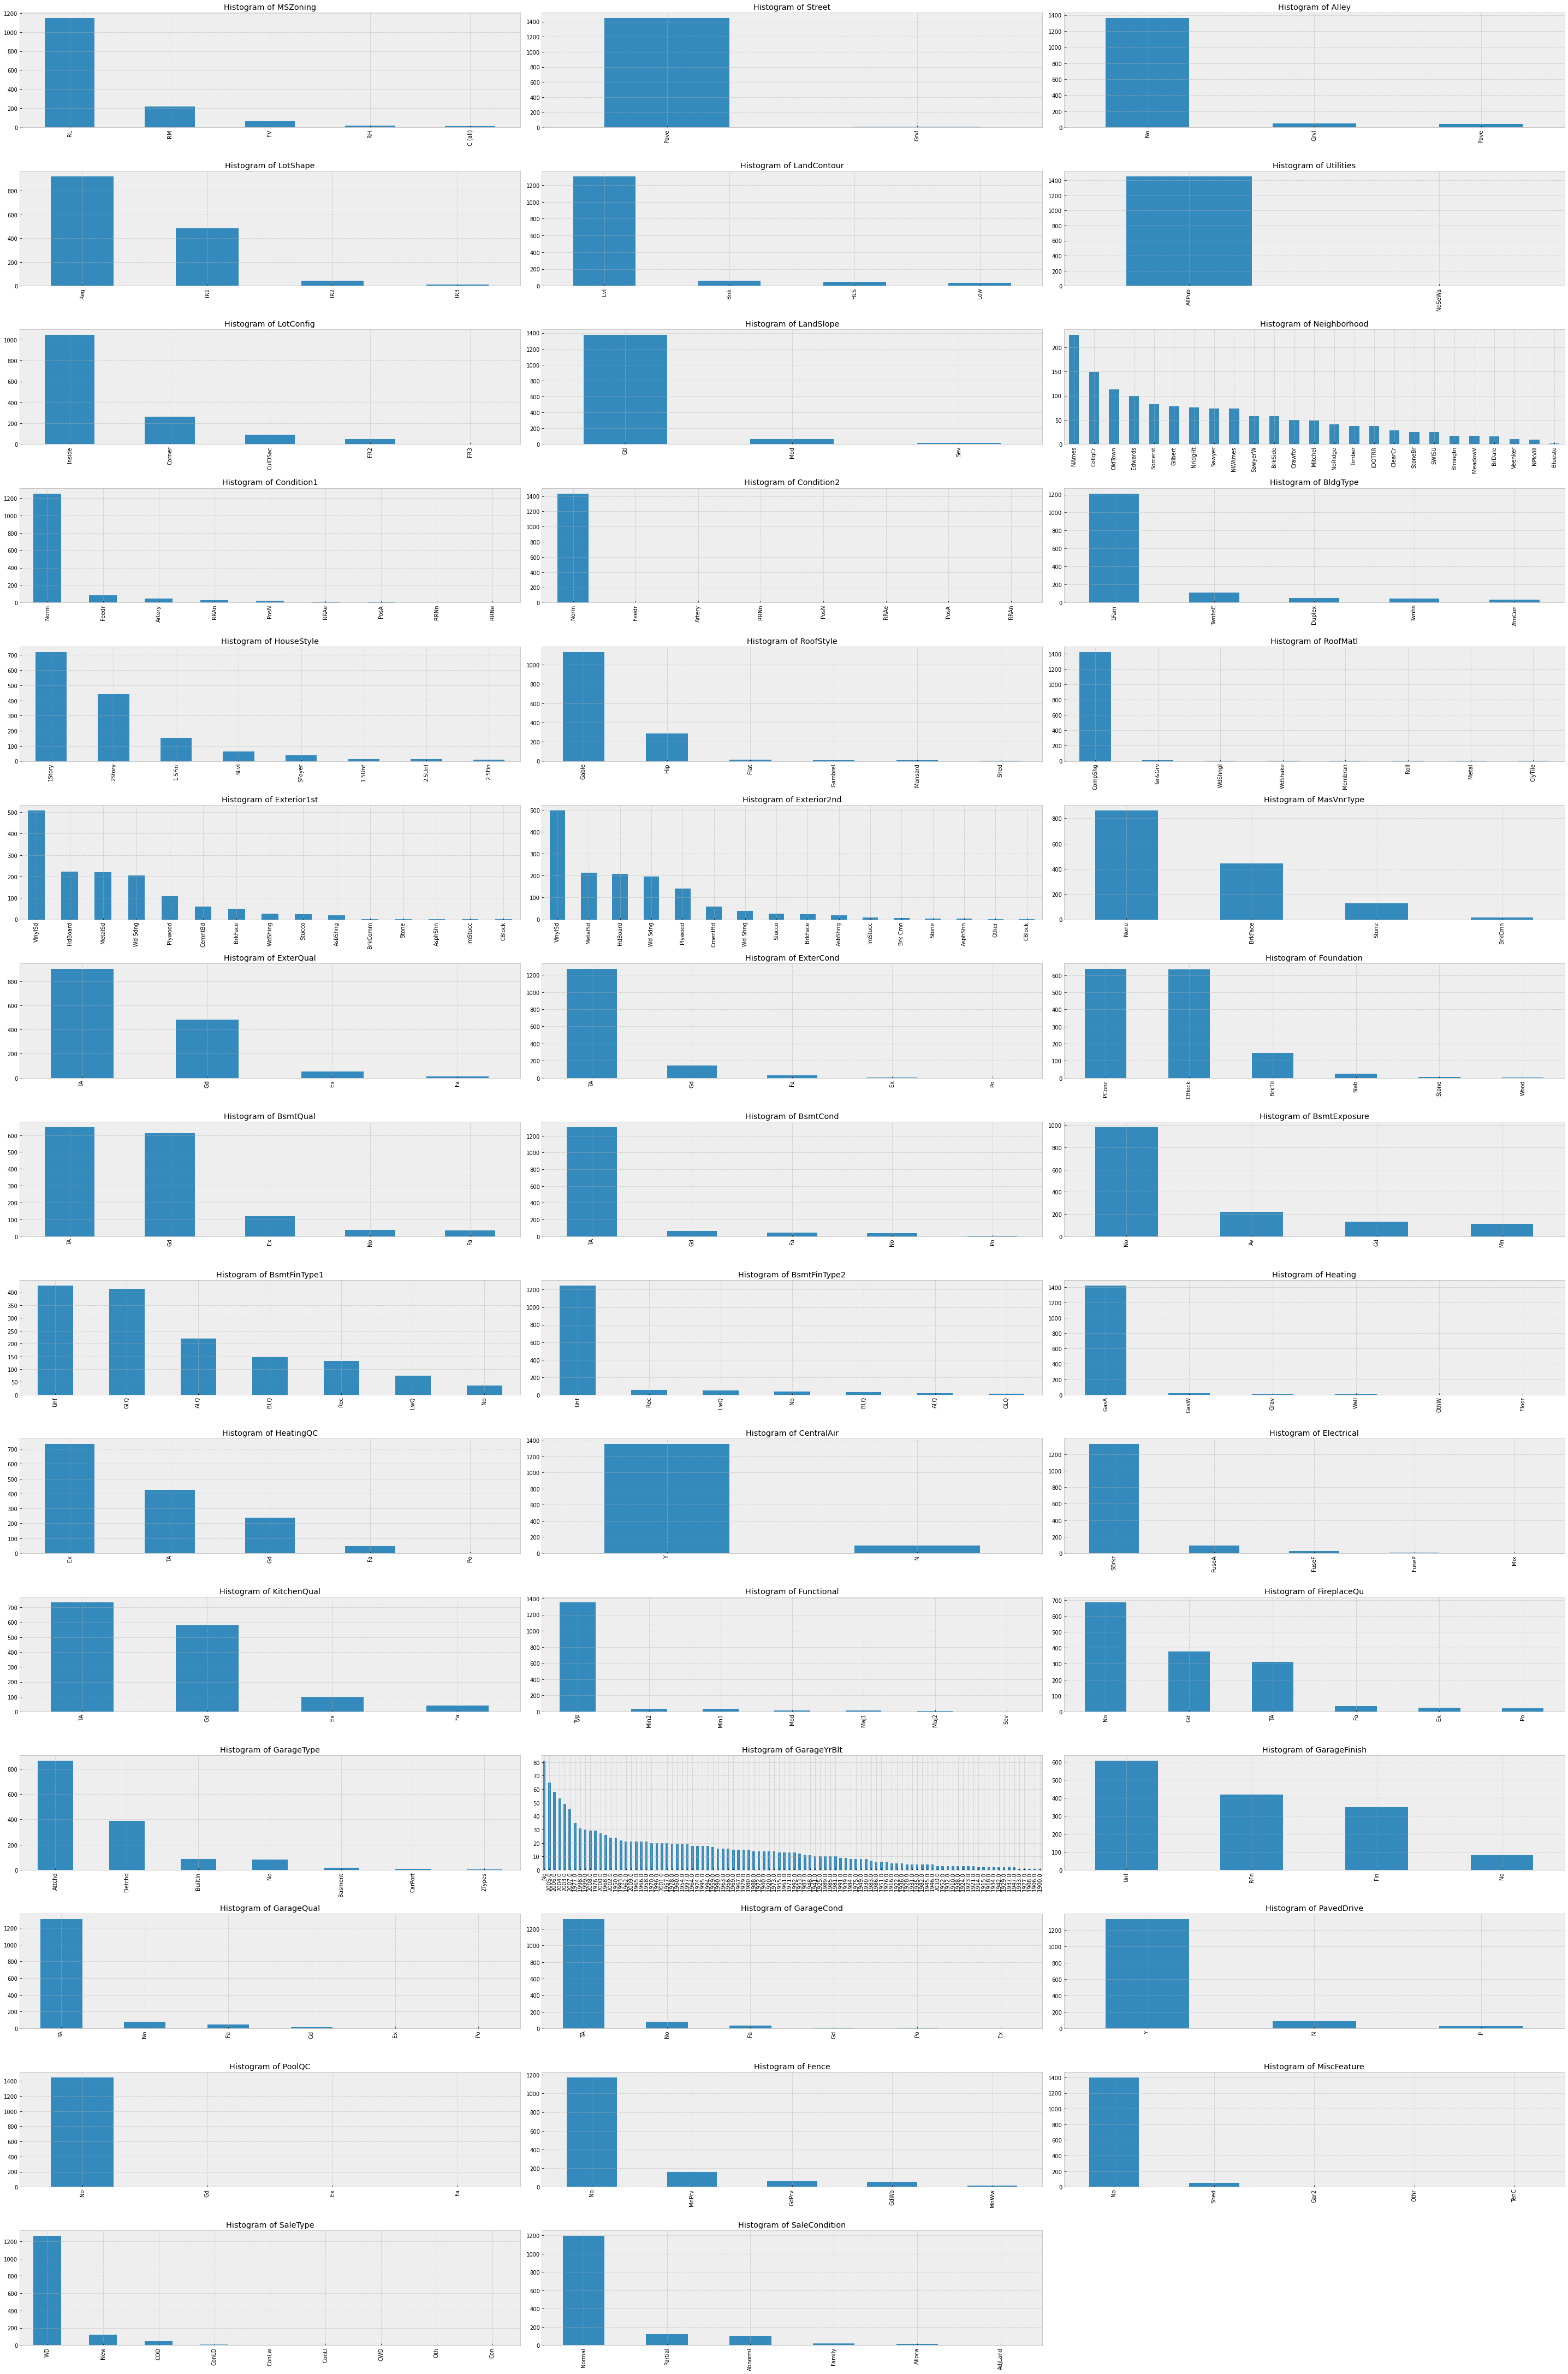

In [31]:
plt.figure(figsize=(40, 80))
plt.style.use('bmh')

num1 = 0

for col in data.columns:
    if data[col].dtype != 'object':
        continue
        
        
    
    num1 += 1
    plt.subplot(20, 3, num1)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    data[col].value_counts().plot(kind='bar')

In [32]:
print('Количество числовых признаков:', num)
print('Количество категориальных признаков:', num1)

Количество числовых признаков: 36
Количество категориальных признаков: 44


## Очистим выборку от выбросов

In [33]:
data['HeatingQC'].value_counts()

Ex    734
TA    427
Gd    240
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [34]:
data = data[data['HeatingQC'] !='Po']

Удалили 'Po', так как всего 1 элемент.

In [35]:
data['Foundation'].value_counts()

PConc     638
CBlock    633
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [36]:
data = data[(data['Foundation'] !='Wood') & (data['Foundation'] != 'Stone')]

Удалили 'Stone' и 'Wood', так как других типов значительно больше.

In [37]:
data['GarageCond'].value_counts()

TA    1308
No      81
Fa      35
Gd       9
Po       6
Ex       2
Name: GarageCond, dtype: int64

In [38]:
data = data[(data['GarageCond'] !='Ex') & (data['GarageCond'] != 'Po') & (data['GarageCond'] != 'Gd')]

Удалили 'Ex', 'Po' и 'Gd', так как других типов значительно больше.

In [39]:
data['MSZoning'].value_counts()

RL         1128
RM          209
FV           62
RH           16
C (all)       9
Name: MSZoning, dtype: int64

In [40]:
data = data[(data['MSZoning'] !='C (all)') & (data['MSZoning'] != 'RH')]

Удалили 'RH' и 'C (all)', так как других типов значительно больше.

In [41]:
data['Utilities'].value_counts()

AllPub    1398
NoSeWa       1
Name: Utilities, dtype: int64

In [42]:
data = data[(data['Utilities'] !='NoSeWa')]

Удалили 'NoSeWa', так как всего 1 элемент.

In [43]:
data = data[(data['SalePrice'] < 600000)]

In [44]:
len(data['SalePrice'])

1394

Удалили редкие дорогие случаи(до этого было 1460)

## Encoding

In [45]:
cnt=0
cat_list=[]

for col in data.columns:
    if data[col].dtype != 'object':
        continue
    cat_list.append(col)
    cnt += 1
    print(cnt, col)

1 MSZoning
2 Street
3 Alley
4 LotShape
5 LandContour
6 Utilities
7 LotConfig
8 LandSlope
9 Neighborhood
10 Condition1
11 Condition2
12 BldgType
13 HouseStyle
14 RoofStyle
15 RoofMatl
16 Exterior1st
17 Exterior2nd
18 MasVnrType
19 ExterQual
20 ExterCond
21 Foundation
22 BsmtQual
23 BsmtCond
24 BsmtExposure
25 BsmtFinType1
26 BsmtFinType2
27 Heating
28 HeatingQC
29 CentralAir
30 Electrical
31 KitchenQual
32 Functional
33 FireplaceQu
34 GarageType
35 GarageYrBlt
36 GarageFinish
37 GarageQual
38 GarageCond
39 PavedDrive
40 PoolQC
41 Fence
42 MiscFeature
43 SaleType
44 SaleCondition


Отберем признаки:
OverallCond, OverallQual, KitchenQual, BsmtQual, ExterQual, Neighborhood, TotalBsmtSF,1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, GarageCars, GarageQual, GarageYrBlt, YearRemodAdd

In [46]:
def label_encoding1(x):
    if (x == 'Ex'):
        return 5
    elif (x == 'Gd'):
        return 4
    elif (x == 'TA'):
        return 3
    elif (x == 'Fa'):
        return 2
    elif (x == 'Po'):
        return 1
    elif (x == 0):
        return 0
    elif (x == 'NaN'):
        return 0
    


def label_encoding2(x):
    if (x == 'Gd'):
        return 5
    elif (x == 'Av'):
        return 4
    elif (x == 'Mn'):
        return 3
    elif (x == 'No_b'):
        return 2
    elif (x == 'Po'):
        return 1
    elif (x == 0):
        return 0 
    elif (x == 'NaN'):
        return 0

In [47]:
data['KitchenQual'] = data['KitchenQual'].apply(label_encoding1)
data['BsmtQual'] = data['BsmtQual'].apply(label_encoding2)
data['ExterQual'] = data['ExterQual'].apply(label_encoding1)
data['GarageQual'] = data['GarageQual'].apply(label_encoding1)


data['KitchenQual']  = data['KitchenQual'].fillna(0)
data['BsmtQual']  = data['BsmtQual'].fillna(0)
data['ExterQual']  = data['ExterQual'].fillna(0)
data['GarageType']  = data['GarageType'].fillna(0)
data['GarageQual']  = data['GarageQual'].fillna(0)

Применили порядковый label encoding

In [48]:
means = data.groupby('Neighborhood')['SalePrice'].mean().to_dict()
data['Neighborhood'] = data['Neighborhood'].map(means)

Применили target encoding

In [49]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2) 

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.22,-0.14,-0.00,0.03,-0.08,0.05,0.04,0.03,0.02,0.17,-0.07,-0.07,-0.15,-0.25,-0.26,0.30,0.03,0.05,0.01,-0.01,0.12,0.19,-0.06,0.26,-0.00,0.01,-0.04,-0.03,-0.10,-0.06,-0.01,-0.01,-0.02,-0.04,-0.03,0.00,-0.01,-0.01,-0.01,-0.09
LotFrontage,-0.22,1.00,0.10,0.12,0.17,-0.05,0.04,0.08,0.10,0.13,-0.07,0.07,-0.01,0.16,0.24,0.25,0.03,0.05,0.22,0.01,-0.03,0.12,-0.02,0.16,0.04,0.12,0.23,0.05,0.16,0.20,0.02,-0.01,0.07,0.04,0.02,0.03,0.14,-0.06,0.01,-0.02,0.20
LotArea,-0.14,0.10,1.00,0.15,0.10,-0.00,0.01,0.01,0.09,0.05,0.03,0.21,0.11,-0.01,0.26,0.29,0.05,0.01,0.26,0.16,0.05,0.12,0.01,0.12,-0.02,0.06,0.19,0.27,0.15,0.18,0.08,0.17,0.09,-0.02,0.02,0.04,0.08,0.04,0.01,-0.01,0.26
Neighborhood,-0.00,0.12,0.15,1.00,0.69,-0.23,0.63,0.51,0.39,0.67,0.40,0.23,-0.05,0.23,0.46,0.40,0.17,-0.07,0.44,0.15,-0.06,0.49,0.20,0.01,-0.13,0.59,0.31,0.31,0.57,0.53,0.23,0.24,0.22,-0.15,0.02,0.01,-0.02,-0.05,0.07,-0.01,0.75
OverallQual,0.03,0.17,0.10,0.69,1.00,-0.11,0.57,0.55,0.40,0.73,0.35,0.21,-0.06,0.32,0.53,0.46,0.29,-0.01,0.60,0.10,-0.05,0.54,0.26,0.09,-0.19,0.68,0.44,0.39,0.60,0.57,0.29,0.23,0.33,-0.10,0.04,0.06,0.05,-0.03,0.10,-0.03,0.80
OverallCond,-0.08,-0.05,-0.00,-0.23,-0.11,1.00,-0.40,0.07,-0.14,-0.16,-0.20,-0.05,0.04,-0.14,-0.18,-0.15,0.01,0.05,-0.10,-0.05,0.12,-0.22,-0.07,-0.02,-0.11,-0.03,-0.08,-0.03,-0.20,-0.16,0.01,-0.01,-0.03,0.07,0.03,0.05,-0.02,0.06,0.02,0.05,-0.10
YearBuilt,0.05,0.04,0.01,0.63,0.57,-0.40,1.00,0.59,0.31,0.61,0.55,0.23,-0.06,0.17,0.39,0.28,0.03,-0.17,0.22,0.17,-0.04,0.48,0.23,-0.06,-0.15,0.53,0.12,0.13,0.54,0.49,0.27,0.22,0.21,-0.37,0.02,-0.06,-0.00,-0.03,0.02,-0.01,0.54
YearRemodAdd,0.04,0.08,0.01,0.51,0.55,0.07,0.59,1.00,0.18,0.59,0.42,0.11,-0.07,0.19,0.29,0.23,0.14,-0.06,0.29,0.11,-0.02,0.44,0.17,-0.05,-0.15,0.63,0.19,0.10,0.42,0.38,0.15,0.20,0.25,-0.20,0.04,-0.04,0.01,-0.01,0.04,0.04,0.52
MasVnrArea,0.03,0.10,0.09,0.39,0.40,-0.14,0.31,0.18,1.00,0.35,0.05,0.25,-0.08,0.12,0.35,0.33,0.17,-0.07,0.38,0.08,0.00,0.26,0.19,0.10,-0.04,0.28,0.28,0.24,0.36,0.37,0.13,0.15,0.13,-0.10,0.03,0.06,0.03,-0.03,0.01,-0.00,0.45
ExterQual,0.02,0.13,0.05,0.67,0.73,-0.16,0.61,0.59,0.35,1.00,0.34,0.19,-0.08,0.30,0.47,0.39,0.18,-0.04,0.44,0.11,-0.07,0.48,0.18,-0.03,-0.15,0.71,0.30,0.23,0.53,0.50,0.21,0.20,0.30,-0.15,0.04,0.01,0.01,-0.05,0.06,-0.01,0.69


In [50]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,197703.798658,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,TA,PConc,5.0,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,No,Attchd,2003,RFn,2,548,3.0,TA,Y,0,61,0,0,0,0,No,No,No,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,238772.727273,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,TA,CBlock,5.0,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,TA,Attchd,1976,RFn,2,460,3.0,TA,Y,298,0,0,0,0,0,No,No,No,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,197703.798658,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,TA,PConc,5.0,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,TA,Attchd,2001,RFn,2,608,3.0,TA,Y,0,42,0,0,0,0,No,No,No,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,214961.673913,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,TA,BrkTil,0.0,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,Gd,Detchd,1998,Unf,3,642,3.0,TA,Y,0,35,272,0,0,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,305948.864865,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,TA,PConc,5.0,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,TA,Attchd,2000,RFn,3,836,3.0,TA,Y,192,84,0,0,0,0,No,No,No,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,226443.566265,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,TA,PConc,5.0,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,4,6,Typ,0,No,Attchd,2004,RFn,2,400,3.0,TA,Y,0,113,0,0,0,0,No,No,No,0,10,2009,WD,Normal,185000
1455,60,RL,62.0,7917,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,192922.155844,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,TA,PConc,5.0,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,3,7,Typ,1,TA,Attchd,1999,RFn,2,460,3.0,TA,Y,0,40,0,0,0,0,No,No,No,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,189050.068493,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,3,TA,CBlock,5.0,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,3,7,Min1,2,TA,Attchd,1978,Unf,2,500,3.0,TA,Y,349,0,0,0,0,0,No,MnPrv,No,0,2,2010,WD,Normal,210000
1458,20,RL,68.0,9717,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,145836.497717,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,3,TA,CBlock,0.0,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0

Сделаем новый признак - полная площадь дома, сложив площадь подвала, 1-го и 2-го этажей:

In [51]:
data['FullSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

def binary_feature(x):
    if (x < 0):
        return 0
    else:
        return 1

In [52]:
favourite_cat = ['OverallCond', 'OverallQual', 'KitchenQual', 'BsmtQual', 'ExterQual', 'Neighborhood', 
                 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'GarageCars',  
                 'GarageQual', 'FullSF']

In [53]:
df = data.filter(items = favourite_cat)
df

,OverallCond,OverallQual,KitchenQual,BsmtQual,ExterQual,Neighborhood,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,GarageCars,GarageQual,FullSF
0,5,7,4,5.0,4,197703.798658,856,856,854,1710,548,2,3.0,2566
1,8,6,3,5.0,3,238772.727273,1262,1262,0,1262,460,2,3.0,2524
2,5,7,4,5.0,4,197703.798658,920,920,866,1786,608,2,3.0,2706
3,5,7,4,0.0,3,214961.673913,756,961,756,1717,642,3,3.0,2473
4,5,8,4,5.0,4,305948.864865,1145,1145,1053,2198,836,3,3.0,3343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5,7,4,5.0,4,226443.566265,1221,1221,0,1221,400,2,3.0,2442
1455,5,6,3,5.0,3,192922.155844,953,953,694,1647,460,2,3.0,2600
1456,6,6,3,5.0,3,189050.068493,1542,2073,0,2073,500,2,3.0,3615
1458,6,5,4,0.0,3,145836.497717,1078,1078,0,1078,240,1,3.0,2156


## TSNE

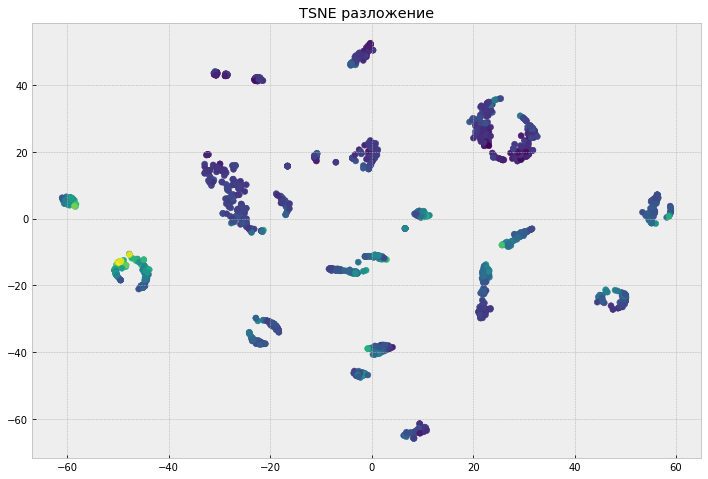

In [54]:
x = df.copy()
y = data['SalePrice']


tsne = TSNE()
X_tsne = tsne.fit_transform(df)

plt.figure(figsize=(12,8))
plt.title('TSNE разложение')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.show()

Попробуем с нормализацией

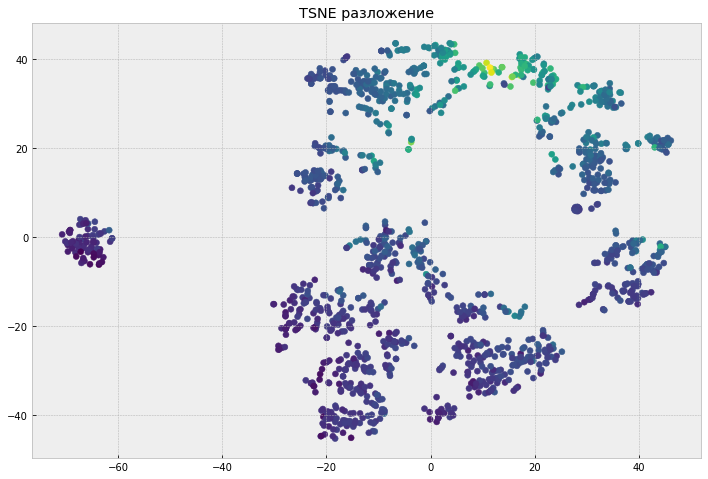

In [55]:
tsne = TSNE()
X_tsne = tsne.fit_transform(StandardScaler().fit_transform(x))

plt.figure(figsize=(12,8))
plt.title('TSNE разложение')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.show()

Благодаря алгоритму TSNE диаграммы видно, что данные разделяются. 

Разобьем датасет

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=228)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=228)

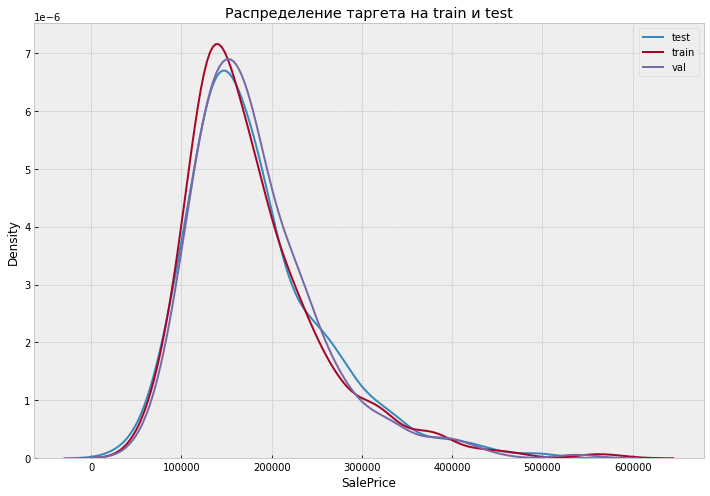

In [57]:
plt.figure(figsize=(12, 8))
plt.title('Распределение таргета на train и test')
sns.kdeplot(y_test, label='test')
sns.kdeplot(y_train, label='train')
sns.kdeplot(y_val, label='val')
plt.legend()

Распределения теста, трейна и валидации более менее совпадают

In [58]:
def report(y_true, y_pred):
    metrics = [('mean absolute error', mean_absolute_error(y_true, y_pred)), ('max error', max_error(y_true, y_pred)),]
    
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')

## RandomForest

In [181]:
model = RandomForestRegressor(n_estimators = 400,min_samples_split = 2, min_samples_leaf = 1,
                              max_features= 'sqrt', random_state=228)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=228, verbose=0, warm_start=False)

In [182]:
report(model.predict(x_test), y_test)

      mean absolute error:            18089.710
                max error:           270686.688


## LinearRegression

In [165]:
model = LinearRegression()
scaler = StandardScaler().fit(x_train)
model.fit(scaler.transform(x_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
report(model.predict(scaler.transform(x_test)), y_test)

      mean absolute error:            20323.564
                max error:           322430.376


## LogisticRegression

In [167]:
model = LogisticRegression(max_iter=1000, penalty='l2')

scaler = StandardScaler().fit(x_train)
model.fit(scaler.transform(x_train), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
report(model.predict(scaler.transform(x_test)), y_test)

      mean absolute error:            30016.695
                max error:           271000.000


## KNN

In [65]:
scaler = StandardScaler().fit(x_train)
model = KNeighborsRegressor(n_neighbors=10)
model.fit(scaler.transform(x_train), y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [66]:
report(model.predict(scaler.transform(x_test)), y_test)

      mean absolute error:            20385.050
                max error:           248991.800


## XGBoost

In [85]:
!pip install xgboost
import xgboost as xgb

In [111]:
model = xgb.XGBRegressor(colsample_bytree=0.2, learning_rate=0.05, max_depth=4, n_estimators=150)
model.fit(x_train, y_train)

[14:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
      mean absolute error:            18255.705
                max error:           307358.781


In [113]:
report(model.predict(x_test), y_test)

      mean absolute error:            18255.705
                max error:           307358.781


## LightGBM

In [112]:
!pip install lightgbm
import lightgbm as lgb

In [242]:
model = lgb.LGBMRegressor(num_leaves=11, learning_rate=0.05, n_estimators=140,bagging_fraction=0.8, 
                          bagging_freq=5, feature_fraction = 0.2319,
                          feature_fraction_seed=9, bagging_seed=10)
model.fit(x_train, y_train)

report(model.predict(x_test), y_test)

      mean absolute error:            17090.795
                max error:           214736.462


Лучше всего себя показал LightGBM

In [258]:
model = lgb.LGBMRegressor(num_leaves=11, learning_rate=0.05, n_estimators=140,bagging_fraction=0.8, 
                          bagging_freq=5, feature_fraction = 0.2319,
                          feature_fraction_seed=9, bagging_seed=10)
model.fit(x_train, y_train)

report(model.predict(x_test), y_test)

      mean absolute error:            17090.795
                max error:           214736.462
